In [6]:
import lic
import numpy as np
import pyvista as pv
import matplotlib.pyplot as plt

In [7]:
# input = '../Data/fourcenters2d.vti'
# output = '../../Paraview/fourcenters/fourcenters'
input = '../Data/beads2d.vti'
output = '../../Paraview/beads/beads'
mesh = pv.read(input)
print(mesh)

UniformGrid (0x2ac4eb52280)
  N Cells:	8241919
  N Points:	8388608
  X Bounds:	-2.000e+00, 2.000e+00
  Y Bounds:	-2.000e+00, 2.000e+00
  Z Bounds:	0.000e+00, 6.283e+00
  Dimensions:	128, 128, 512
  Spacing:	3.150e-02, 3.150e-02, 1.230e-02
  N Arrays:	2



In [8]:
u = mesh.point_data['u']
v = mesh.point_data['v']

un = np.reshape(u, mesh.dimensions, order='F')
vn = np.reshape(v, mesh.dimensions, order='F')

generate lics: 100%|██████████| 15/15 [00:00<00:00, 79.36it/s]


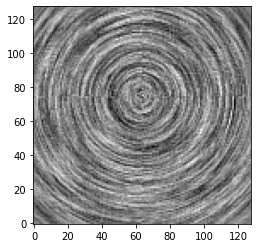

In [9]:
lic_result = lic.lic(un[:,:,0], vn[:,:,0], length=30)

plt.imshow(lic_result, origin='lower', cmap='gray')
plt.show()